# Analyza dat

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns', None)

In [3]:
# nacitanie datasetu
data = pd.read_csv('train_titanic.csv')

print('Data shape: ',data.shape)

Data shape:  (891, 12)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Chybajuce hodnoty

In [6]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

print('Missing values of each col: \n',data[vars_with_na].isnull().sum())

Missing values of each col: 
 Age         177
Cabin       687
Embarked      2
dtype: int64


## Vztah medzi missing values a target atributom

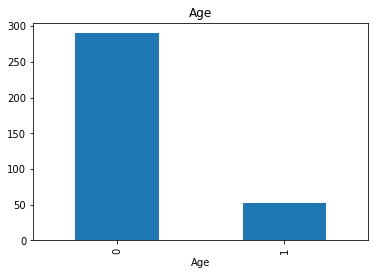

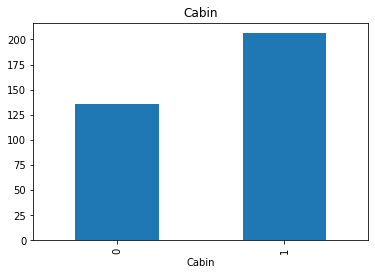

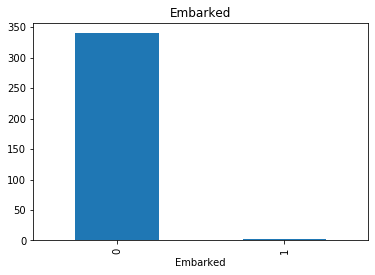

In [8]:
def analyse_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)

    df.groupby(var)['Survived'].sum().plot.bar()
    
    plt.title(var)
    plt.show()


for var in vars_with_na:
    analyse_na_value(data, var)

## Identifikacia numerickych premennych a vizualizacia ich distribucie

In [9]:
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

print('Example of numerical data: \n', data[num_vars].head())

Number of numerical variables:  7
Example of numerical data: 
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


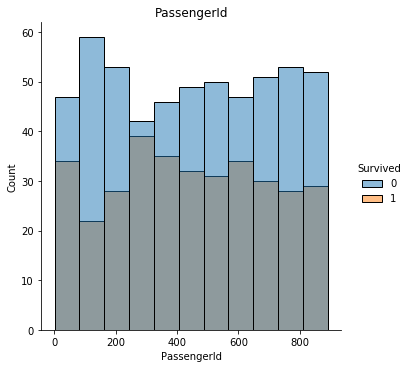

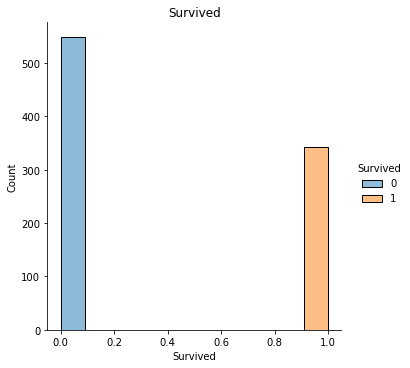

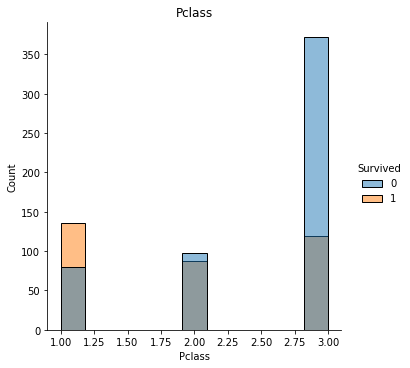

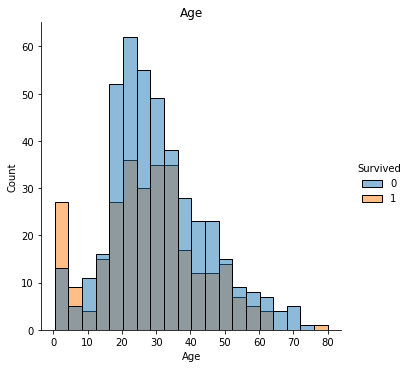

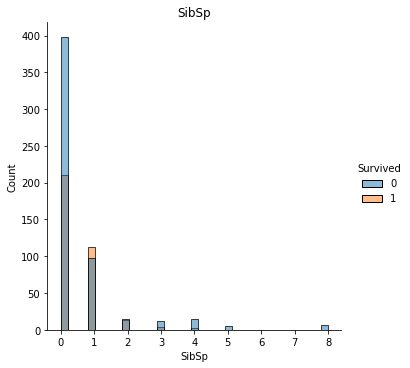

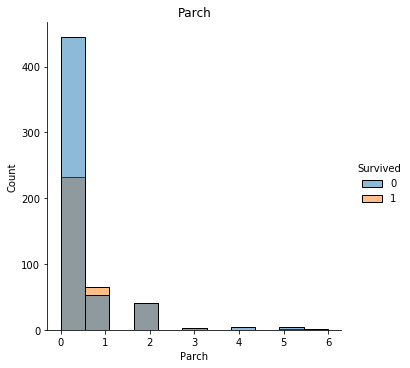

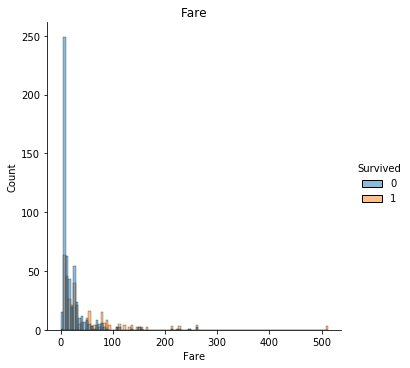

In [10]:
import seaborn as sns

def analyse_num_value(df, var):
    df = df.copy()
    sns.displot(data[num_vars], x=var, hue="Survived")
    plt.title(var)
    plt.show()


for var in num_vars:
    analyse_num_value(data, var)

## Identifikovanie diskretnych hodnot a ich vizualizacia

In [15]:
#  vytvorenie listu diskretnych premennych
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in ['Survived'] ]


print('Number of discrete variables: ', len(discrete_vars))
print('Example of discrete vars: \n', data[discrete_vars].head())

Number of discrete variables:  3
Example of discrete vars: 
    Pclass  SibSp  Parch
0       3      1      0
1       1      1      0
2       3      0      0
3       1      1      0
4       3      0      0


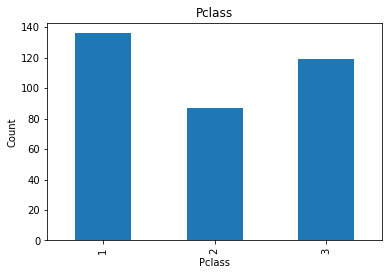

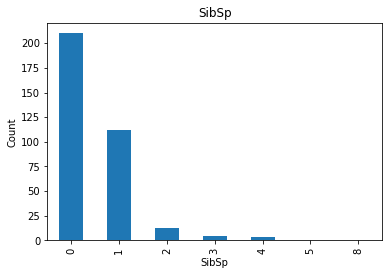

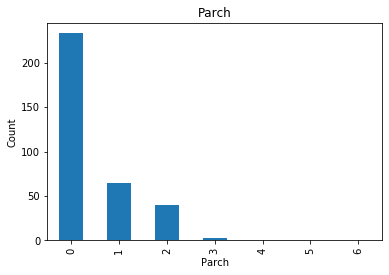

In [16]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['Survived'].sum().plot.bar()
    plt.title(var)
    plt.ylabel('Count')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

## Identifikacia spojitych premennych a ich vizualizacia

In [19]:
# vytvorenie listu spojitych atributov
cont_vars = [
    var for var in num_vars if var not in discrete_vars+['Survived', 'PassengerId']]

print('Number of continuous variables: ', len(cont_vars))
print('Example of continuous data: \n', data[cont_vars].head())

Number of continuous variables:  2
Example of continuous data: 
     Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


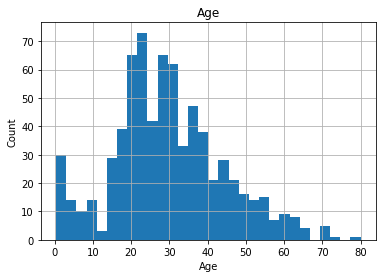

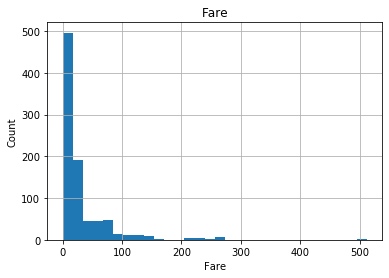

In [22]:
# analyza distribucie spojitych atributov
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_continuous(data, var)

## Identifikacia outlierov a ich vizualizacia

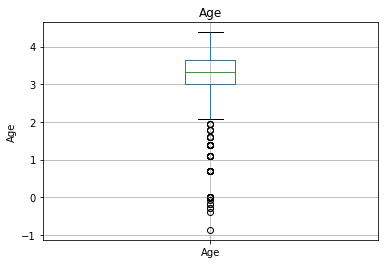

C:\Users\nemci\anaconda3\envs\global\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


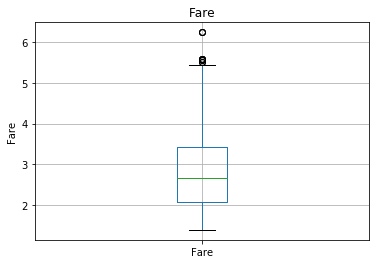

In [25]:
# vytvorenie boxplotov pre zobrazenie outlierov

def find_outliers(df, var):
    df = df.copy()

    df[var] = np.log(df[var])
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in cont_vars:
    find_outliers(data, var)

## Identifikacia nominalnych atributov a zobrazenie poctu unikatnych hodnot

In [26]:
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))
print('Example of nominal vars:\n', data[cat_vars])

Number of categorical variables:  5
Example of nominal vars:
                                                   Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               Ticket Cabin Embarked  
0           A/5 21171   NaN        S  
1            PC 17599   C85        C  
2    STON/O2. 3101282   NaN 

In [27]:
data[cat_vars].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## Identifikacia rare hodnot v kategorickych stlpcoch

In [28]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['Survived'].count() / len(df)

    return tmp[tmp < rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Name
Abbing, Mr. Anthony                      0.001122
Abbott, Mr. Rossmore Edward              0.001122
Abbott, Mrs. Stanton (Rosa Hunt)         0.001122
Abelson, Mr. Samuel                      0.001122
Abelson, Mrs. Samuel (Hannah Wizosky)    0.001122
                                           ...   
de Mulder, Mr. Theodore                  0.001122
de Pelsmaeker, Mr. Alfons                0.001122
del Carlo, Mr. Sebastiano                0.001122
van Billiard, Mr. Austin Blyler          0.001122
van Melkebeke, Mr. Philemon              0.001122
Name: Survived, Length: 891, dtype: float64

Series([], Name: Survived, dtype: float64)

Ticket
110152         0.003367
110413         0.003367
110465         0.002245
110564         0.001122
110813         0.001122
                 ...   
W./C. 6608     0.004489
W./C. 6609     0.001122
W.E.P. 5734    0.001122
W/C 14208      0.001122
WE/P 5735      0.002245
Name: Survived, Length: 681, dtype: float64

Cabin
A10    0.001122
A14    0.001122
A1